In [32]:
# %% [markdown]
# ## 1. Import Required Libraries

# %%
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


Head of DataFrame:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB

Statistical Description:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000



Label Column: y

Label Value Counts:
y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


/var/folders/z9/_kk4dvt12l1146n5_pym3vg40000gn/T/ipykernel_64812/852098237.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


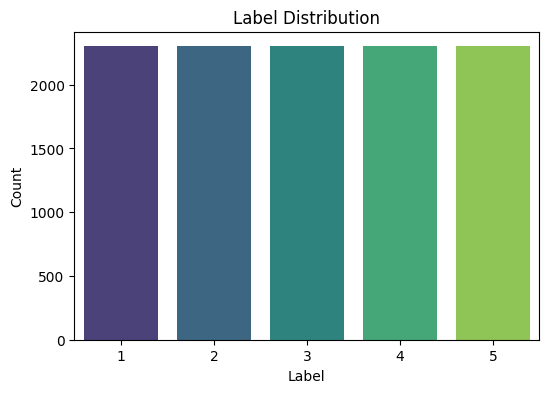

In [33]:
# %% [markdown]
# ## 2. Load & Explore the Dataset
#
# We load the CSV file and then clean it by converting all feature columns to numeric (dropping rows with non‐numeric data).  
# Adjust the path as needed.

# %%
# Define the path to the CSV file (adjust if necessary)
csv_path = os.path.join('..', 'data', 'processed', 'Epileptic Seizure Recognition.csv')

# Load the CSV. 
# Often the CSV may have an extra index column; if so, we can use index_col=0.
df = pd.read_csv(csv_path, index_col=0)
print("Head of DataFrame:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nStatistical Description:")
display(df.describe())

# %%
# Plot the distribution of the label (assumed to be the last column)
label_col = df.columns[-1]
print(f"\nLabel Column: {label_col}")

label_counts = df[label_col].value_counts()
print("\nLabel Value Counts:")
print(label_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [34]:
# %% [markdown]
# ## 3. Define Functions to Generate Spectrogram Images
#
# The following functions will take a 1D EEG signal (an array of 178 numeric values) and convert it into a spectrogram image 
# (RGB format, resized to 224×224) that is suitable as input for the VGG16-based model.

# %%
import io
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from scipy import signal as sig

def generate_spectrogram(signal, fs=178, nperseg=64):
    """
    Generate a spectrogram figure from a 1D numeric EEG signal.
    """
    f, t, Sxx = sig.spectrogram(signal, fs=fs, nperseg=nperseg)
    fig, ax = plt.subplots(figsize=(4,4))
    cax = ax.pcolormesh(t, f, Sxx, shading='gouraud')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.colorbar(cax, ax=ax)
    plt.close(fig)  # Close the figure to avoid inline display
    return fig

def generate_spectrogram_image(signal, target_size=(224,224)):
    """
    Convert a 1D EEG signal into an RGB spectrogram image.
    """
    fig = generate_spectrogram(signal)
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf).convert('RGB')
    img = img.resize(target_size)
    img_array = img_to_array(img)
    buf.close()
    return img_array

In [35]:
# %% [markdown]
# ## 4. Prepare Test Data: Clean and Generate Spectrogram Images
#
# We clean the dataset by converting all feature columns to numeric and dropping rows with NaN values.  
# Then, we extract the features (X) and labels (y), convert labels to binary (seizure = 1, non-seizure = 0), split into train/test sets, and generate spectrogram images for the test set.

# %%
# Clean the data: convert all columns to numeric and drop rows with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric.dropna(inplace=True)
print("After cleaning, dataset shape:", df_numeric.shape)

After cleaning, dataset shape: (11500, 179)


In [36]:
# Assume the last column is the label and all preceding columns are features
X = df_numeric.iloc[:, :-1].values.astype(float)
y = df_numeric.iloc[:, -1].values.astype(float)

# Convert labels to binary: seizure if value == 1, else non-seizure (0)
y = (y == 1).astype(int)
print("Total samples after cleaning:", X.shape[0])

Total samples after cleaning: 11500


In [37]:
# Split the data (for evaluation we'll use the test split)
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Test samples:", X_test.shape[0])

Test samples: 2300


In [39]:
# %%
# Generate spectrogram images for the test set
# This loop converts each test signal (1D array) into an image.
test_images = []
for i in range(X_test.shape[0]):
    img_array = generate_spectrogram_image(X_test[i])
    test_images.append(img_array)
test_images = np.array(test_images)
print("Test images shape:", test_images.shape)


Test images shape: (2300, 224, 224, 3)


In [40]:
# %% [markdown]
# ## 5. Load Saved Model & Training History
#
# We load the previously saved model and training history from the "models" directory.

# %%
model_path = os.path.join('..', 'models', 'saved_model.h5')
history_path = os.path.join('..', 'models', 'training_history.pkl')

model = load_model(model_path)
print("Model loaded successfully.")

with open(history_path, 'rb') as f:
    history = pickle.load(f)
print("Training history loaded.")


Model loaded successfully.
Training history loaded.


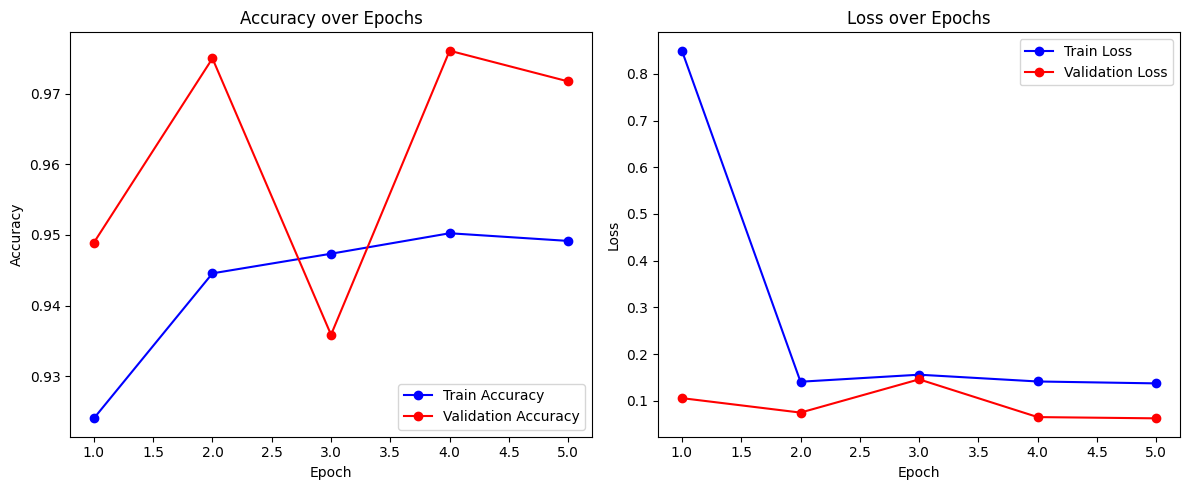

In [41]:
# %% [markdown]
# ## 6. Visualize Training Metrics
#
# Plot the training and validation accuracy and loss over the epochs.

# %%
if history:
    epochs = range(1, len(history['accuracy']) + 1)
    
    plt.figure(figsize=(12,5))
    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(epochs, history['accuracy'], 'bo-', label='Train Accuracy')
    plt.plot(epochs, history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(epochs, history['loss'], 'bo-', label='Train Loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No training history available.")


In [42]:
# %% [markdown]
# ## 7. Evaluate the Model on Test Data
#
# Evaluate the loaded model on the test set (using the generated spectrogram images) and display evaluation metrics.

# %%
loss, accuracy = model.evaluate(test_images, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.0746
Test Accuracy: 0.9661


72/72 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step


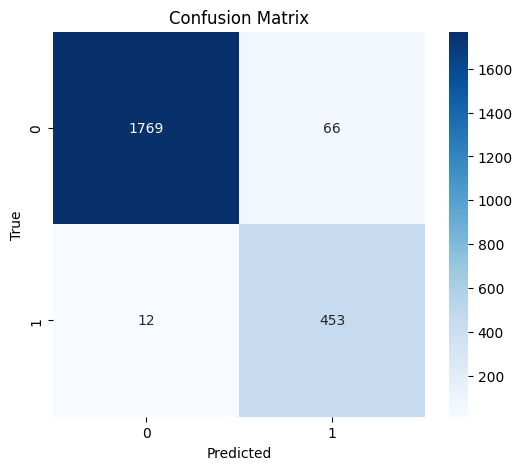

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1835
           1       0.87      0.97      0.92       465

    accuracy                           0.97      2300
   macro avg       0.93      0.97      0.95      2300
weighted avg       0.97      0.97      0.97      2300



In [43]:
# %%
# Generate predictions and then create a confusion matrix and classification report.
y_pred_prob = model.predict(test_images)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))